In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Acc_clf_acco_to_Road_Cond_2014_and_2016.csv'
road_data = pd.read_csv(file_path)

# Display basic info about the dataset
road_data.info()

# Display the first few rows to get a sense of the data
road_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 98 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   S. No.                                                    37 non-null     object 
 1   State/ UT                                                 37 non-null     object 
 2   Surfaced Roads-Accident - 2014                            36 non-null     float64
 3   Surfaced Roads- Killed - 2014                             37 non-null     int64  
 4   Surfaced Roads-Injured - 2014                             36 non-null     float64
 5   Metalled Roads-Accident - 2014                            36 non-null     float64
 6   Metalled Roads- Killed - 2014                             37 non-null     int64  
 7   Metalled Roads-Injured - 2014                             36 non-null     float64
 8   Kutcha Roads-Accident 

,S. No.,State/ UT,Surfaced Roads-Accident - 2014,Surfaced Roads- Killed - 2014,Surfaced Roads-Injured - 2014,Metalled Roads-Accident - 2014,Metalled Roads- Killed - 2014,Metalled Roads-Injured - 2014,Kutcha Roads-Accident - 2014,Kutcha Roads- Killed - 2014,...,Sharp Curve - Persons Injured - 2016,Steep Gradient - Number of Accidents - 2016,Steep Gradient - Persons Killed - 2016,Steep Gradient - Persons Injured - 2016,Earthern Shoulder Edge Drop - Number of Accidents - 2016,Earthern Shoulder Edge Drop - Persons Killed - 2016,Earthern Shoulder Edge Drop - Persons Injured - 2016,Others - Number of Accidents - 2016,Others - Persons Killed - 2016,Others - Persons Injured - 2016
0,1,Andhra Pradesh,13846.0,4333,17323.0,5211.0,2392,4138.0,5383.0,1183,...,1185,144,38,189,255,145,302,3651,1290,4420
1,2,Arunachal Pradesh,81.0,43,111.0,73.0,37,97.0,51.0,39,...,65,0,0,0,0,0,0,44,22,91
2,3,Assam,4948.0,1631,5043.0,1296.0,548,824.0,900.0,343,...,22,44,9,24,2,2,9,1634,645,1153
3,4,Bihar,5990.0,3184,3732.0,2194.0,1148,1601.0,1372.0,581,...,491,117,59,119,123,65,133,1328,773,944
4,5,Chhattisgarh,7248.0,2111,7170.0,4799.0,1301,4543.0,1774.0,610,...,152,109,39,114,8,2,8,1499,453,1329


In [ ]:
# Check for missing values
missing_values = road_data.isnull().sum()
print(missing_values)

S. No.                                                  0
State/ UT                                               0
Surfaced Roads-Accident - 2014                          1
Surfaced Roads- Killed - 2014                           0
Surfaced Roads-Injured - 2014                           1
                                                       ..
Earthern Shoulder Edge Drop - Persons Killed - 2016     0
Earthern Shoulder Edge Drop - Persons Injured - 2016    0
Others - Number of Accidents - 2016                     0
Others - Persons Killed - 2016                          0
Others - Persons Injured - 2016                         0
Length: 98, dtype: int64


In [ ]:

# Fill missing numerical values with median
numerical_cols = road_data.select_dtypes(include=['float64', 'int64']).columns
road_data[numerical_cols] = road_data[numerical_cols].fillna(road_data[numerical_cols].median())

# Fill missing categorical values with mode
categorical_cols = road_data.select_dtypes(include=['object']).columns
road_data[categorical_cols] = road_data[categorical_cols].fillna(road_data[categorical_cols].mode().iloc[0])

# Verify if all missing values are handled
print(road_data.isnull().sum().sum())



0


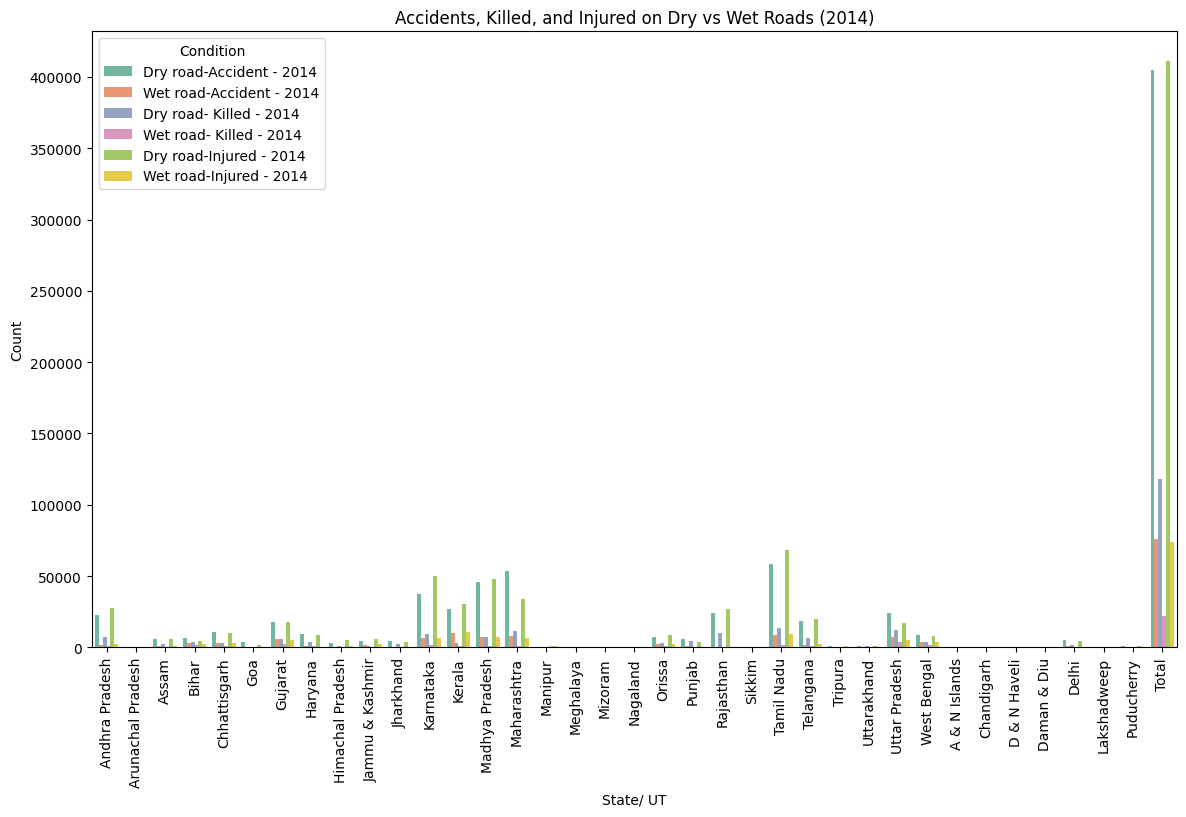

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Analyze 'Dry Roads' vs 'Wet Roads' in 2016 for accidents, killed, and injured
conditions_2014 = ['Dry road-Accident - 2014', 'Wet road-Accident - 2014',
                   'Dry road- Killed - 2014', 'Wet road- Killed - 2014',
                   'Dry road-Injured - 2014', 'Wet road-Injured - 2014']

Pucca_vs_kutcha_roads=[']Pucca road (Normal Road) - Number of Accidents - 2016', 'Kutcha road (Normal Road) - Number of Accidents - 2016'
'Pucca road (Normal Road) - Persons Injured - 2016', 'Kutcha road (Normal Road) - Persons Injured - 2016'
'Pucca road (Normal Road) - Persons Killed - 2016', 'Kutcha road (Normal Road) - Persons Killed - 2016']

'Slippery surface-Accident - 2014', 'Slippery surface-Killed - 2014', 'Slippery surface-Injured - 2014'
road_data_subset = road_data[['State/ UT'] + conditions_2014]

# Visualization: Bar plot for accidents, killed, and injured on dry vs wet roads
road_data_melted = road_data_subset.melt(id_vars='State/ UT', var_name='Condition', value_name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(x='State/ UT', y='Count', hue='Condition', data=road_data_melted, palette='Set2')
plt.title('Accidents, Killed, and Injured on Dry vs Wet Roads (2014)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Extract relevant columns for speed breakers in 2016
speed_breakers_columns = [
    'State/ UT',
    'Speed Breakers - Number of Accidents - 2016',
    'Speed Breakers - Persons Injured - 2016',
    'Speed Breakers - Persons Killed - 2016'
]

speed_breakers_data = road_data[speed_breakers_columns]

# Display the data for speed breakers
speed_breakers_data.head()


,State/ UT,Speed Breakers - Number of Accidents - 2016,Speed Breakers - Persons Injured - 2016,Speed Breakers - Persons Killed - 2016
0,Andhra Pradesh,579,678,201
1,Arunachal Pradesh,9,17,6
2,Assam,71,74,30
3,Bihar,358,298,173
4,Chhattisgarh,166,164,48


In [ ]:
# Check for missing values
missing_values = speed_breakers_data.isnull().sum()

# Fill missing numerical values with median
numerical_cols = speed_breakers_data.select_dtypes(include=['float64', 'int64']).columns
speed_breakers_data[numerical_cols] = speed_breakers_data[numerical_cols].fillna(speed_breakers_data[numerical_cols].median())

# Verify if all missing values are handled
speed_breakers_data.isnull().sum()

<ipython-input-8-9207b2e11c5f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speed_breakers_data[numerical_cols] = speed_breakers_data[numerical_cols].fillna(speed_breakers_data[numerical_cols].median())


,0
State/ UT,0
Speed Breakers - Number of Accidents - 2016,0
Speed Breakers - Persons Injured - 2016,0
Speed Breakers - Persons Killed - 2016,0


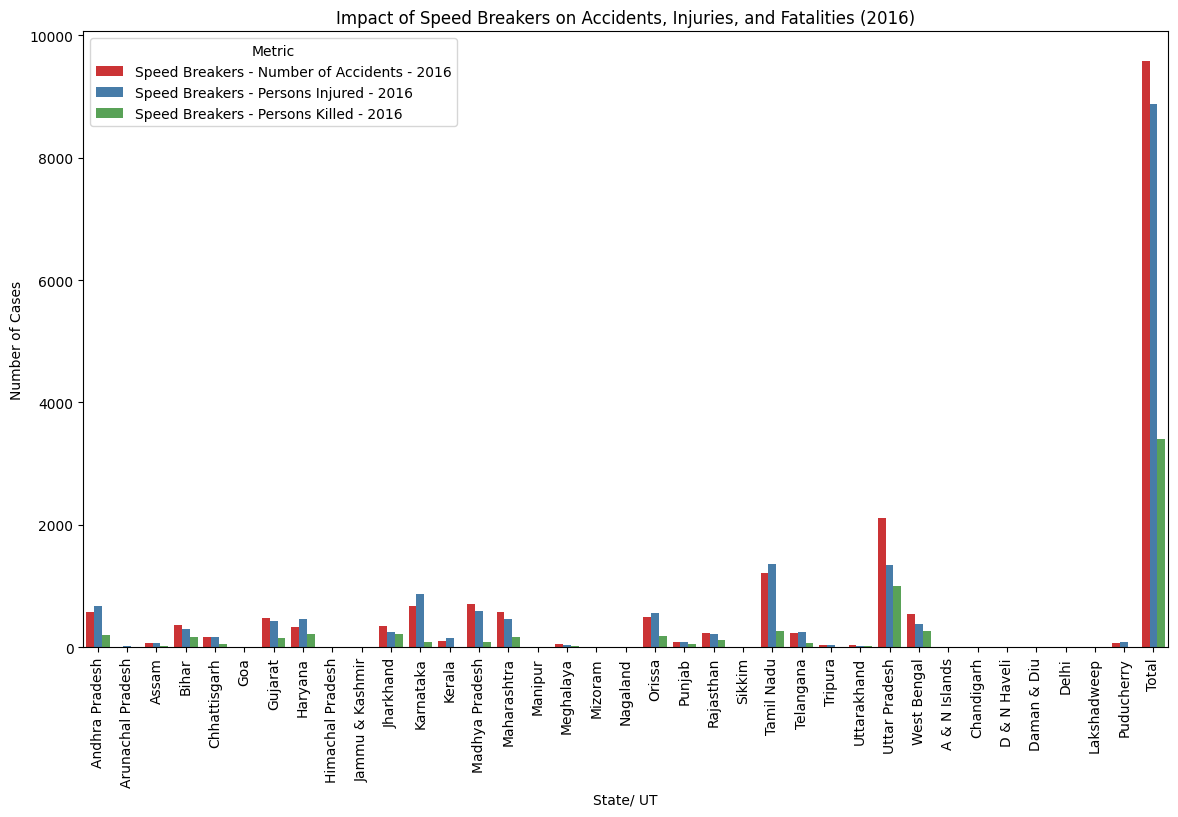

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Bar plot for accidents, injured, and killed due to speed breakers in 2016
speed_breakers_data_melted = speed_breakers_data.melt(id_vars='State/ UT', var_name='Metric', value_name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(x='State/ UT', y='Count', hue='Metric', data=speed_breakers_data_melted, palette='Set1')
plt.title('Impact of Speed Breakers on Accidents, Injuries, and Fatalities (2016)')
plt.xticks(rotation=90)
plt.ylabel('Number of Cases')
plt.xlabel('State/ UT')
plt.show()


Pie Chart:

To show the proportion of accidents, injuries, and fatalities caused by speed breakers in 2016 for each state.

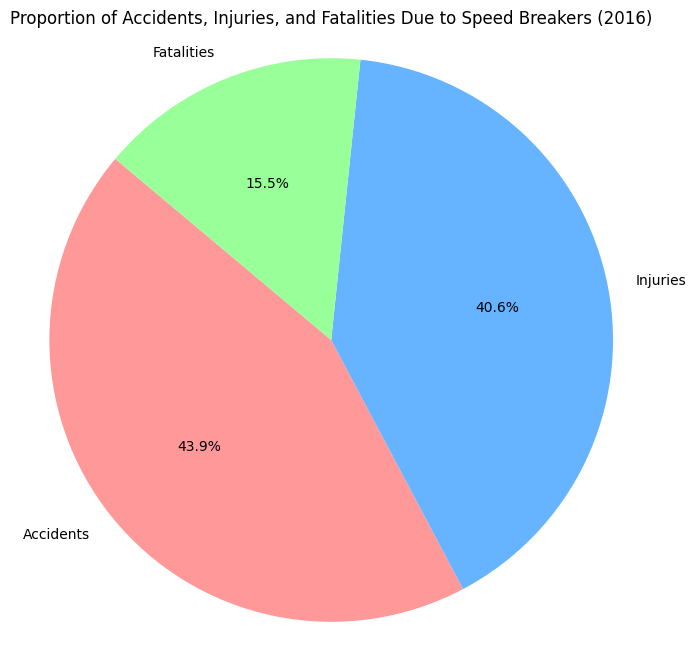

In [ ]:
import matplotlib.pyplot as plt

# Summing up the total accidents, injuries, and fatalities for speed breakers
total_accidents = speed_breakers_data['Speed Breakers - Number of Accidents - 2016'].sum()
total_injuries = speed_breakers_data['Speed Breakers - Persons Injured - 2016'].sum()
total_fatalities = speed_breakers_data['Speed Breakers - Persons Killed - 2016'].sum()

# Labels and sizes for the pie chart
labels = ['Accidents', 'Injuries', 'Fatalities']
sizes = [total_accidents, total_injuries, total_fatalities]
colors = ['#ff9999','#66b3ff','#99ff99']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Accidents, Injuries, and Fatalities Due to Speed Breakers (2016)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Stacked Bar Chart:

To display the number of accidents, injuries, and fatalities stacked on top of each other for each state/UT.

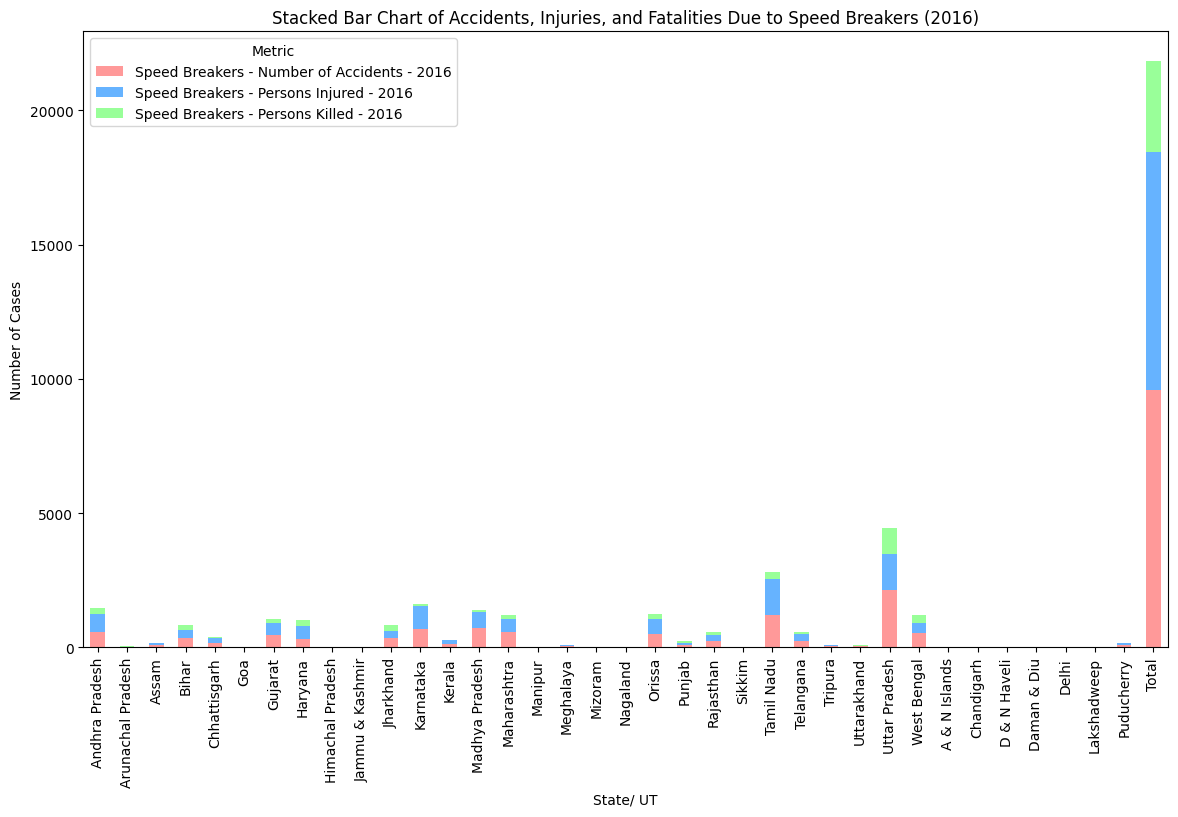

In [ ]:
# Stacked Bar Chart
speed_breakers_data.set_index('State/ UT', inplace=True)
speed_breakers_data.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#ff9999', '#66b3ff', '#99ff99'])

plt.title('Stacked Bar Chart of Accidents, Injuries, and Fatalities Due to Speed Breakers (2016)')
plt.ylabel('Number of Cases')
plt.xlabel('State/ UT')
plt.xticks(rotation=90)
plt.legend(title='Metric')
plt.show()


**Useful for seeing the total impact and comparing between states.**

Heatmap:

To identify the states/UTs with higher numbers of accidents, injuries, and fatalities due to speed breakers.

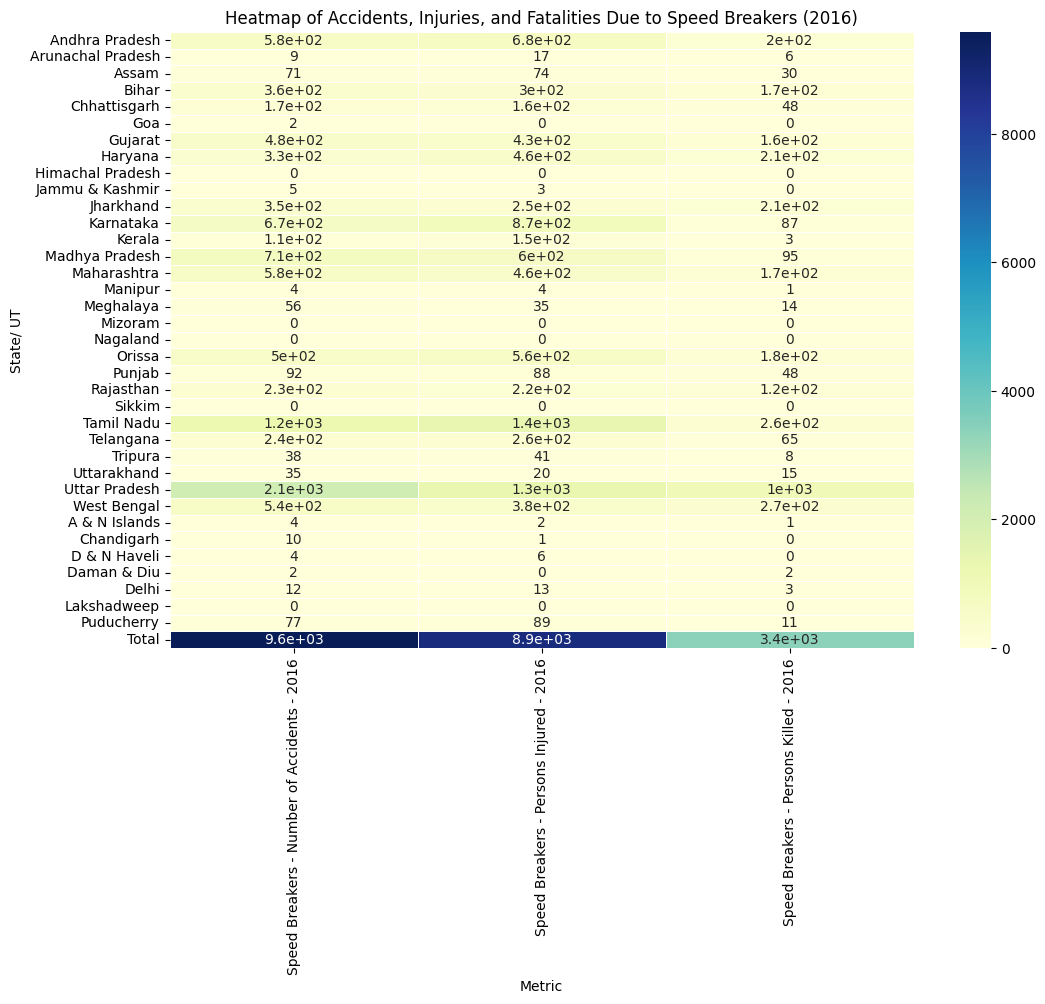

In [ ]:
import seaborn as sns

# Heatmap of the number of accidents, injuries, and fatalities for each state
plt.figure(figsize=(12, 8))
sns.heatmap(speed_breakers_data, annot=True, cmap='YlGnBu', linewidths=.5)

plt.title('Heatmap of Accidents, Injuries, and Fatalities Due to Speed Breakers (2016)')
plt.ylabel('State/ UT')
plt.xlabel('Metric')
plt.show()


**Highlights the areas (states) with the highest impact**

Line Plot:

To observe trends over states/UTs, especially if the data is sorted by the number of accidents or fatalities.

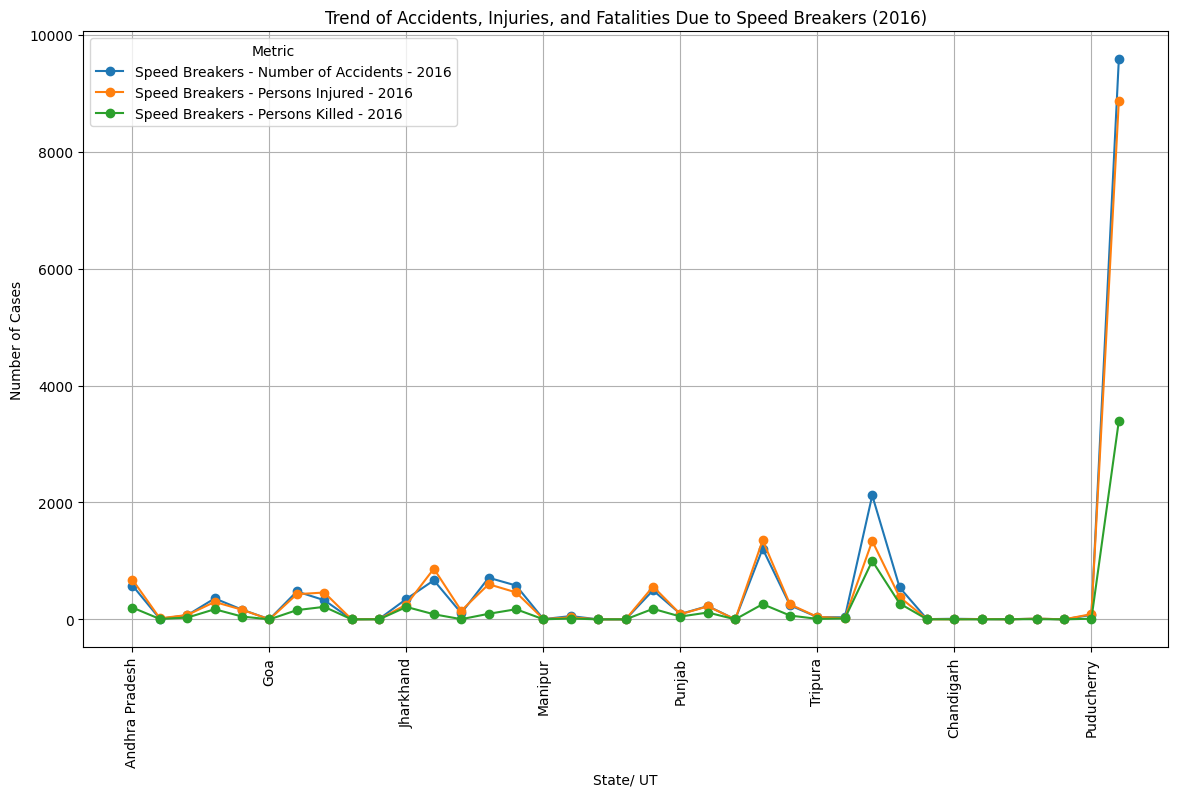

In [ ]:
# Line Plot
speed_breakers_data.reset_index().plot(kind='line', x='State/ UT', y=['Speed Breakers - Number of Accidents - 2016',
                                                                     'Speed Breakers - Persons Injured - 2016',
                                                                     'Speed Breakers - Persons Killed - 2016'],
                                       figsize=(14, 8), marker='o')

plt.title('Trend of Accidents, Injuries, and Fatalities Due to Speed Breakers (2016)')
plt.ylabel('Number of Cases')
plt.xlabel('State/ UT')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(title='Metric')
plt.show()


**Shows trends and can be useful if the data is sorted.**

Box Plot:

To visualize the distribution and outliers of accidents, injuries, and fatalities across states/UTs.

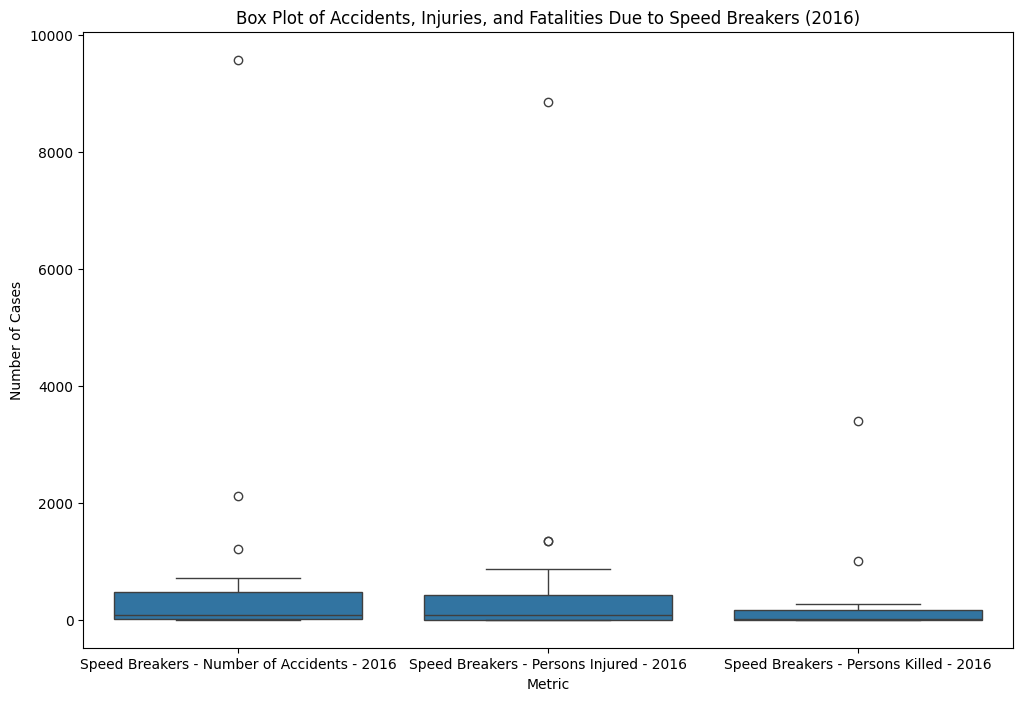

In [ ]:
# Melt the data for easier plotting
speed_breakers_data_melted = speed_breakers_data.reset_index().melt(id_vars='State/ UT', var_name='Metric', value_name='Count')

# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Metric', y='Count', data=speed_breakers_data_melted)

plt.title('Box Plot of Accidents, Injuries, and Fatalities Due to Speed Breakers (2016)')
plt.ylabel('Number of Cases')
plt.xlabel('Metric')
plt.show()


**Helps in understanding the distribution and identifying outliers.**